# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Imam Waliyuddin Rabbani
- Email: imamwaliyuddinrabbani@gmail.com
- Id Dicoding: imamwaliyuddin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [32]:
from sqlalchemy import create_engine  # untuk membuat koneksi engine ke database SQL menggunakan SQLAlchemy
import pandas as pd                 # untuk manipulasi dan analisis data dengan DataFrame
import numpy as np                  # untuk perhitungan numerik dan manipulasi array
import time                         # untuk fungsi terkait waktu (misal pengukuran durasi eksekusi)
import matplotlib.pyplot as plt     # untuk membuat visualisasi data dengan matplotlib
import seaborn as sns               # untuk visualisasi statistik yang lebih menarik berbasis matplotlib

from sklearn.model_selection import train_test_split  # untuk membagi dataset menjadi data latih dan uji
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # untuk standarisasi fitur numeric dan enkoding fitur kategorikal
from sklearn.linear_model import LogisticRegression  # model regresi logistik
from sklearn.tree import DecisionTreeClassifier       # model pohon keputusan
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # model ensemble: Random Forest dan Gradient Boosting
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,  # metrik evaluasi klasifikasi
    confusion_matrix, classification_report                   # matriks kebingungan dan laporan klasifikasi
)
from sklearn.compose import ColumnTransformer  # untuk menerapkan berbagai transformasi pada subset kolom
from sklearn.pipeline import Pipeline           # untuk membuat alur (pipeline) preprocessing + model

import joblib  # untuk menyimpan dan memuat model/objek Python yang dibangun

# Konfigurasi tampilan visualisasi
sns.set(style='whitegrid')  # atur style seaborn dengan grid putih
plt.style.use('seaborn-v0_8-whitegrid')  # atur style matplotlib agar selaras dengan seaborn
pd.set_option('display.max_columns', None)  # tampilkan semua kolom saat mencetak DataFrame

# Menonaktifkan peringatan untuk menjaga output tetap bersih
import warnings
warnings.filterwarnings('ignore')  # abaikan peringatan yang dihasilkan oleh library

### Menyiapkan data yang akan diguankan

In [33]:
# Koneksi database PostgreSQL (contoh, dikomentari jika tidak digunakan)
# engine = create_engine(
#     'postgresql+psycopg2://postgres:@localhost:5432/postgres'
# )  # buat engine koneksi ke database lokal Postgres menggunakan SQLAlchemy

# Membaca tabel 'student' dari database ke DataFrame (dikomentari jika tidak menggunakan SQL)
# df = pd.read_sql(
#     'student',  # nama tabel atau query SQL
#     engine      # engine koneksi SQLAlchemy
# )

# Membaca data dari file CSV lokal dengan delimiter titik-koma
df = pd.read_csv(
    'data\data.csv',  # path ke file CSV (gunakan escape backslash atau raw string)
    sep=';'            # tentukan delimiter ';' untuk memisahkan kolom
)

# Menampilkan informasi lima baris pertama DataFrame
df_head = df.head()  # ambil lima baris pertama
print("Lima baris pertama data:")
display(df_head)      # tampilkan DataFrame dengan format tabel")

Lima baris pertama data:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Eksplorasi Awal

In [34]:
# Cetak judul bagian deskriptif untuk data numerik
print("\nStatistik Deskriptif Data Numerik:")

# Tampilkan ringkasan statistik (count, mean, std, min, quartiles, max) untuk semua kolom numerik
display(df.describe())


Statistik Deskriptif Data Numerik:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [36]:
# Cetak judul bagian deskriptif untuk data kategorikal
print("\nStatistik Deskriptif Data Kategorikal:")

# Tampilkan statistik deskriptif untuk kolom bertipe objek (biasanya kategorikal)
# Termasuk count, unique, top (mode), dan freq (frekuensi mode)
display(df.describe(include='object'))


Statistik Deskriptif Data Kategorikal:


,Status
count,4424
unique,3
top,Graduate
freq,2209


In [35]:
# Cetak judul bagian untuk menampilkan jumlah nilai hilang per kolom
print("\nJumlah Nilai Hilang per Kolom:")

# Hitung dan cetak jumlah nilai null (NaN) di setiap kolom DataFrame
print(df.isnull().sum())


Jumlah Nilai Hilang per Kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment 

In [37]:
# Cetak judul bagian untuk menampilkan jumlah baris duplikat
print("\nJumlah Baris Duplikat:")

# Hitung jumlah baris yang merupakan duplikat dalam DataFrame dan cetak hasilnya
print(f"Terdapat {df.duplicated().sum()} baris duplikat.")


Jumlah Baris Duplikat:
Terdapat 0 baris duplikat.


In [38]:
# Cetak judul bagian untuk menampilkan distribusi variabel target 'Status'
print("\nDistribusi Variabel Target (Status):")

# Hitung dan cetak frekuensi masing-masing kategori pada kolom 'Status'
print(df['Status'].value_counts())


Distribusi Variabel Target (Status):
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [39]:
# Cetak judul bagian untuk menampilkan persentase distribusi variabel target 'Status'
print("\nPersentase Distribusi Variabel Target (Status):")

# Hitung dan cetak persentase masing-masing kategori pada kolom 'Status'
print(df['Status'].value_counts(normalize=True) * 100)


Persentase Distribusi Variabel Target (Status):
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


In [40]:
# Cetak judul bagian untuk menampilkan jumlah nilai unik per kolom
print("\nJumlah Nilai Unik per Kolom:")

# Loop melalui setiap kolom dan cetak jumlah nilai uniknya
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Jumlah Nilai Unik per Kolom:
Marital_status: 6
Application_mode: 18
Application_order: 8
Course: 17
Daytime_evening_attendance: 2
Previous_qualification: 17
Previous_qualification_grade: 101
Nacionality: 21
Mothers_qualification: 29
Fathers_qualification: 34
Mothers_occupation: 32
Fathers_occupation: 46
Admission_grade: 620
Displaced: 2
Educational_special_needs: 2
Debtor: 2
Tuition_fees_up_to_date: 2
Gender: 2
Scholarship_holder: 2
Age_at_enrollment: 46
International: 2
Curricular_units_1st_sem_credited: 21
Curricular_units_1st_sem_enrolled: 23
Curricular_units_1st_sem_evaluations: 35
Curricular_units_1st_sem_approved: 23
Curricular_units_1st_sem_grade: 805
Curricular_units_1st_sem_without_evaluations: 11
Curricular_units_2nd_sem_credited: 19
Curricular_units_2nd_sem_enrolled: 22
Curricular_units_2nd_sem_evaluations: 30
Curricular_units_2nd_sem_approved: 20
Curricular_units_2nd_sem_grade: 786
Curricular_units_2nd_sem_without_evaluations: 10
Unemployment_rate: 10
Inflation_rate: 9
GDP

### EDA

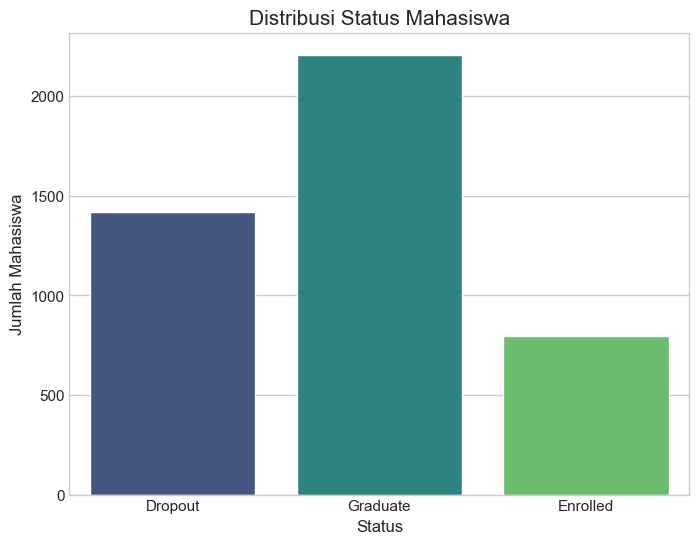

In [41]:
# Buat figure dengan ukuran 8x6 inci
plt.figure(figsize=(8, 6))

# Buat countplot untuk kolom 'Status' menggunakan seaborn
sns.countplot(x='Status', data=df, palette='viridis')

# Tambahkan judul dan label sumbu
plt.title('Distribusi Status Mahasiswa', fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

# Tampilkan plot
plt.show()

Distribusi status mahasiswa dalam dataset memperlihatkan bahwa dari total 4.420 mahasiswa, kelompok **Graduate** mendominasi dengan sekitar 2.200 orang (50 %), diikuti oleh **Dropout** sebanyak 1.420 mahasiswa (32 %), sedangkan mahasiswa **Enrolled** hanya berjumlah sekitar 800 orang (18 %). Kecenderungan ini menunjukkan bahwa program studi secara umum berhasil menyelesaikan setengah pesertanya, meski angka dropout yang masih signifikan mengindikasikan perlunya analisis lebih lanjut terhadap faktor–faktor penyebab (akademik, finansial, atau personal) dan penerapan intervensi dini, sementara proporsi mahasiswa aktif yang relatif kecil menandakan sebagian besar populasi sudah memasuki fase akhir studi atau keluar program.

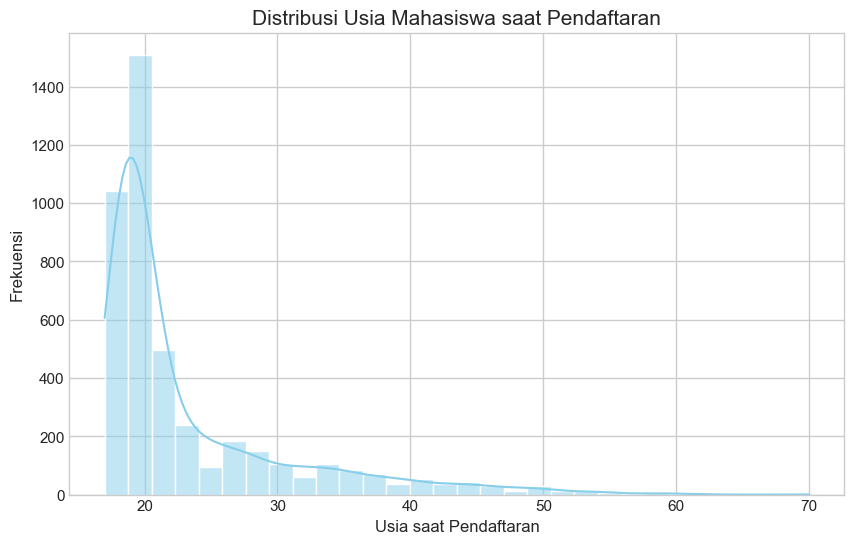

In [42]:
# Buat figure dengan ukuran 10x6 inci
plt.figure(figsize=(10, 6))

# Buat histogram distribusi untuk kolom 'Age_at_enrollment' dengan KDE dan 30 bin
sns.histplot(df['Age_at_enrollment'], kde=True, bins=30, color='skyblue')

# Tambahkan judul dan label sumbu
plt.title('Distribusi Usia Mahasiswa saat Pendaftaran', fontsize=15)
plt.xlabel('Usia saat Pendaftaran', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Tampilkan plot
plt.show()

Distribusi usia mahasiswa saat pendaftaran menunjukkan bahwa mayoritas (lebih dari 60 %) berusia antara 18–22 tahun, dengan puncak frekuensi di sekitar 19–20 tahun, sedangkan di atas rentang itu frekuensi menurun secara bertahap sampai ke usia sekitar 70 tahun, sehingga distribusi bersifat “right-skewed” dengan ekor panjang: ini mengindikasikan dominasi mahasiswa tradisional usia awal 20-an sekaligus keberadaan minoritas mahasiswa non-tradisional berusia jauh lebih tua; implikasinya, kampus perlu mempertimbangkan segmentasi layanan akademik dan dukungan administratif sesuai kebutuhan tiap kelompok usia serta memeriksa potensi outlier usia untuk memastikan kualitas data.

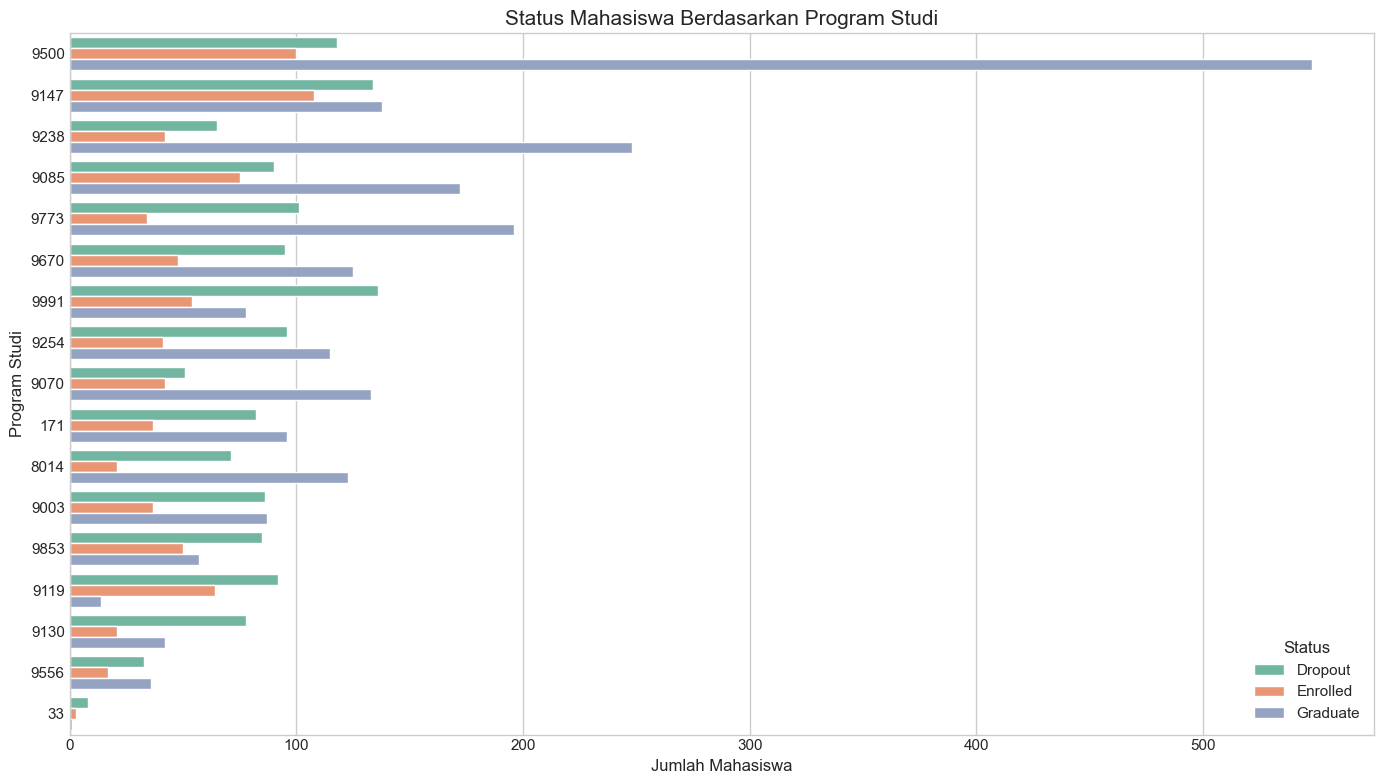

In [43]:
# Buat figure dengan ukuran 14x8 inci
plt.figure(figsize=(14, 8))

# Buat countplot horizontal (sumbu y) untuk kolom 'Course' dan pisahkan berdasarkan 'Status'
# Urutkan berdasarkan jumlah kemunculan 'Course'
sns.countplot(
    y='Course',
    hue='Status',
    data=df,
    palette='Set2',
    order=df['Course'].value_counts().index
)

# Tambahkan judul dan label sumbu
plt.title('Status Mahasiswa Berdasarkan Program Studi', fontsize=15)
plt.xlabel('Jumlah Mahasiswa', fontsize=12)
plt.ylabel('Program Studi', fontsize=12)

# Tampilkan legenda untuk status
plt.legend(title='Status')

# Atur layout agar elemen tidak terpotong
plt.tight_layout()

# Tampilkan plot
plt.show()

Distribusi status per program studi memperlihatkan heterogenitas yang signifikan: **Nursing (9500)** menempati peringkat teratas dengan \~550 lulusan, \~115 dropout, dan \~105 mahasiswa masih aktif, diikuti oleh **Management (9147)** dan **Social Service (9238)** yang juga menunjukkan rasio lulusan-to-dropout yang sehat, sementara program-program seperti **Management (evening attendance) (9991)** dan **Equinculture (9130)** malah mencatat lebih banyak mahasiswa berhenti daripada yang lulus, dan **Informatics Engineering (9119)** relatif sedikit lulusan. Di ujung lain spektrum, **Biofuel Production Technologies (33)** hanya memiliki beberapa puluh mahasiswa total. Temuan ini mengindikasikan perlunya evaluasi lebih lanjut terhadap kurikulum, dukungan akademik, dan intervensi khusus pada program dengan tingkat dropout tinggi untuk meningkatkan retensi dan kelulusan.

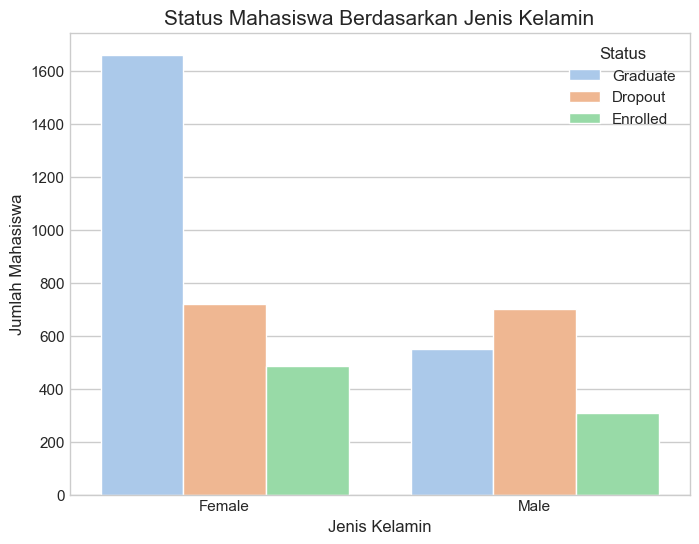

In [44]:
# Buat figure dengan ukuran 8x6 inci
plt.figure(figsize=(8, 6))

# Buat countplot untuk kolom 'Gender' dan pisahkan berdasarkan 'Status'
sns.countplot(x='Gender', hue='Status', data=df, palette='pastel')

# Ganti label sumbu x dari angka ke label kategori
plt.xticks([0, 1], ['Female', 'Male'])

# Tambahkan judul dan label sumbu
plt.title('Status Mahasiswa Berdasarkan Jenis Kelamin', fontsize=15)
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

# Tampilkan legenda untuk status
plt.legend(title='Status')

# Tampilkan plot
plt.show()

Distribusi status mahasiswa menurut jenis kelamin menunjukkan kontras mencolok: meski total perempuan (\~2.850) hampir dua kali lipat laki-laki (\~1.550), proporsi lulusan perempuan (±1.650) jauh melebihi drop-out (±720) dan enrolled (±480), sedangkan pada mahasiswa laki-laki jumlah drop-out (±700) bahkan lebih tinggi daripada lulusan (±550) dan enrolled (±300). Hal ini mengindikasikan bahwa mahasiswa perempuan tidak hanya lebih banyak tetapi juga memiliki tingkat penyelesaian studi yang lebih baik, sementara mahasiswa laki-laki menghadapi risiko putus studi yang relatif lebih besar, sehingga diperlukan strategi intervensi yang difokuskan pada pendampingan dan dukungan akademik bagi kelompok laki-laki untuk meningkatkan retensi dan kelulusan.

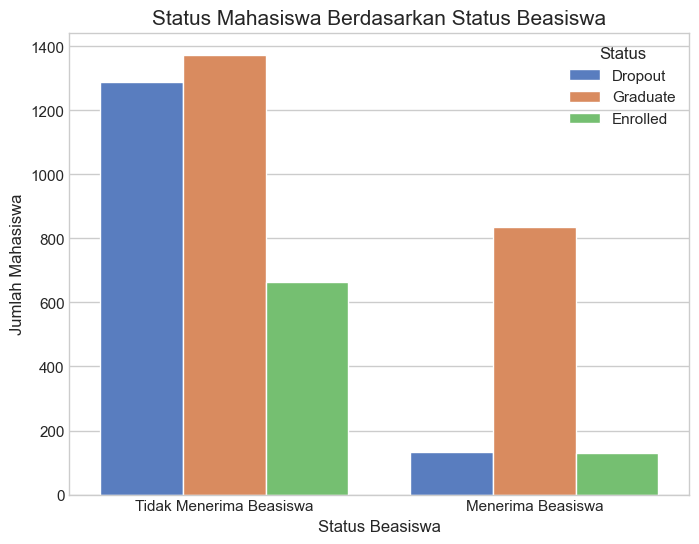

In [45]:
# Buat figure dengan ukuran 8x6 inci
plt.figure(figsize=(8, 6))

# Buat countplot untuk kolom 'Scholarship_holder' dan pisahkan berdasarkan 'Status'
sns.countplot(x='Scholarship_holder', hue='Status', data=df, palette='muted')

# Ganti label sumbu x agar lebih informatif
plt.xticks([0, 1], ['Tidak Menerima Beasiswa', 'Menerima Beasiswa'])

# Tambahkan judul dan label sumbu
plt.title('Status Mahasiswa Berdasarkan Status Beasiswa', fontsize=15)
plt.xlabel('Status Beasiswa', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

# Tampilkan legenda untuk status
plt.legend(title='Status')

# Tampilkan plot
plt.show()

Distribusi status mahasiswa berdasarkan penerimaan beasiswa memperlihatkan perbedaan yang signifikan: dari sekitar 1.100 mahasiswa penerima beasiswa, sekitar 835 (≈76 %) telah lulus, hanya 135 (≈12 %) yang berhenti, dan 130 (≈12 %) masih aktif; sementara di antara ≈3.325 non-penerima beasiswa, hanya ≈1.375 (≈41 %) yang lulus, hampir sama banyaknya dengan yang drop out (≈1.290, ≈39 %), dan sekitar 660 (≈20 %) masih terdaftar. Dengan demikian, beasiswa tampak berkontribusi kuat dalam meningkatkan retensi dan keberhasilan akademik, serta menurunkan risiko putus studi.

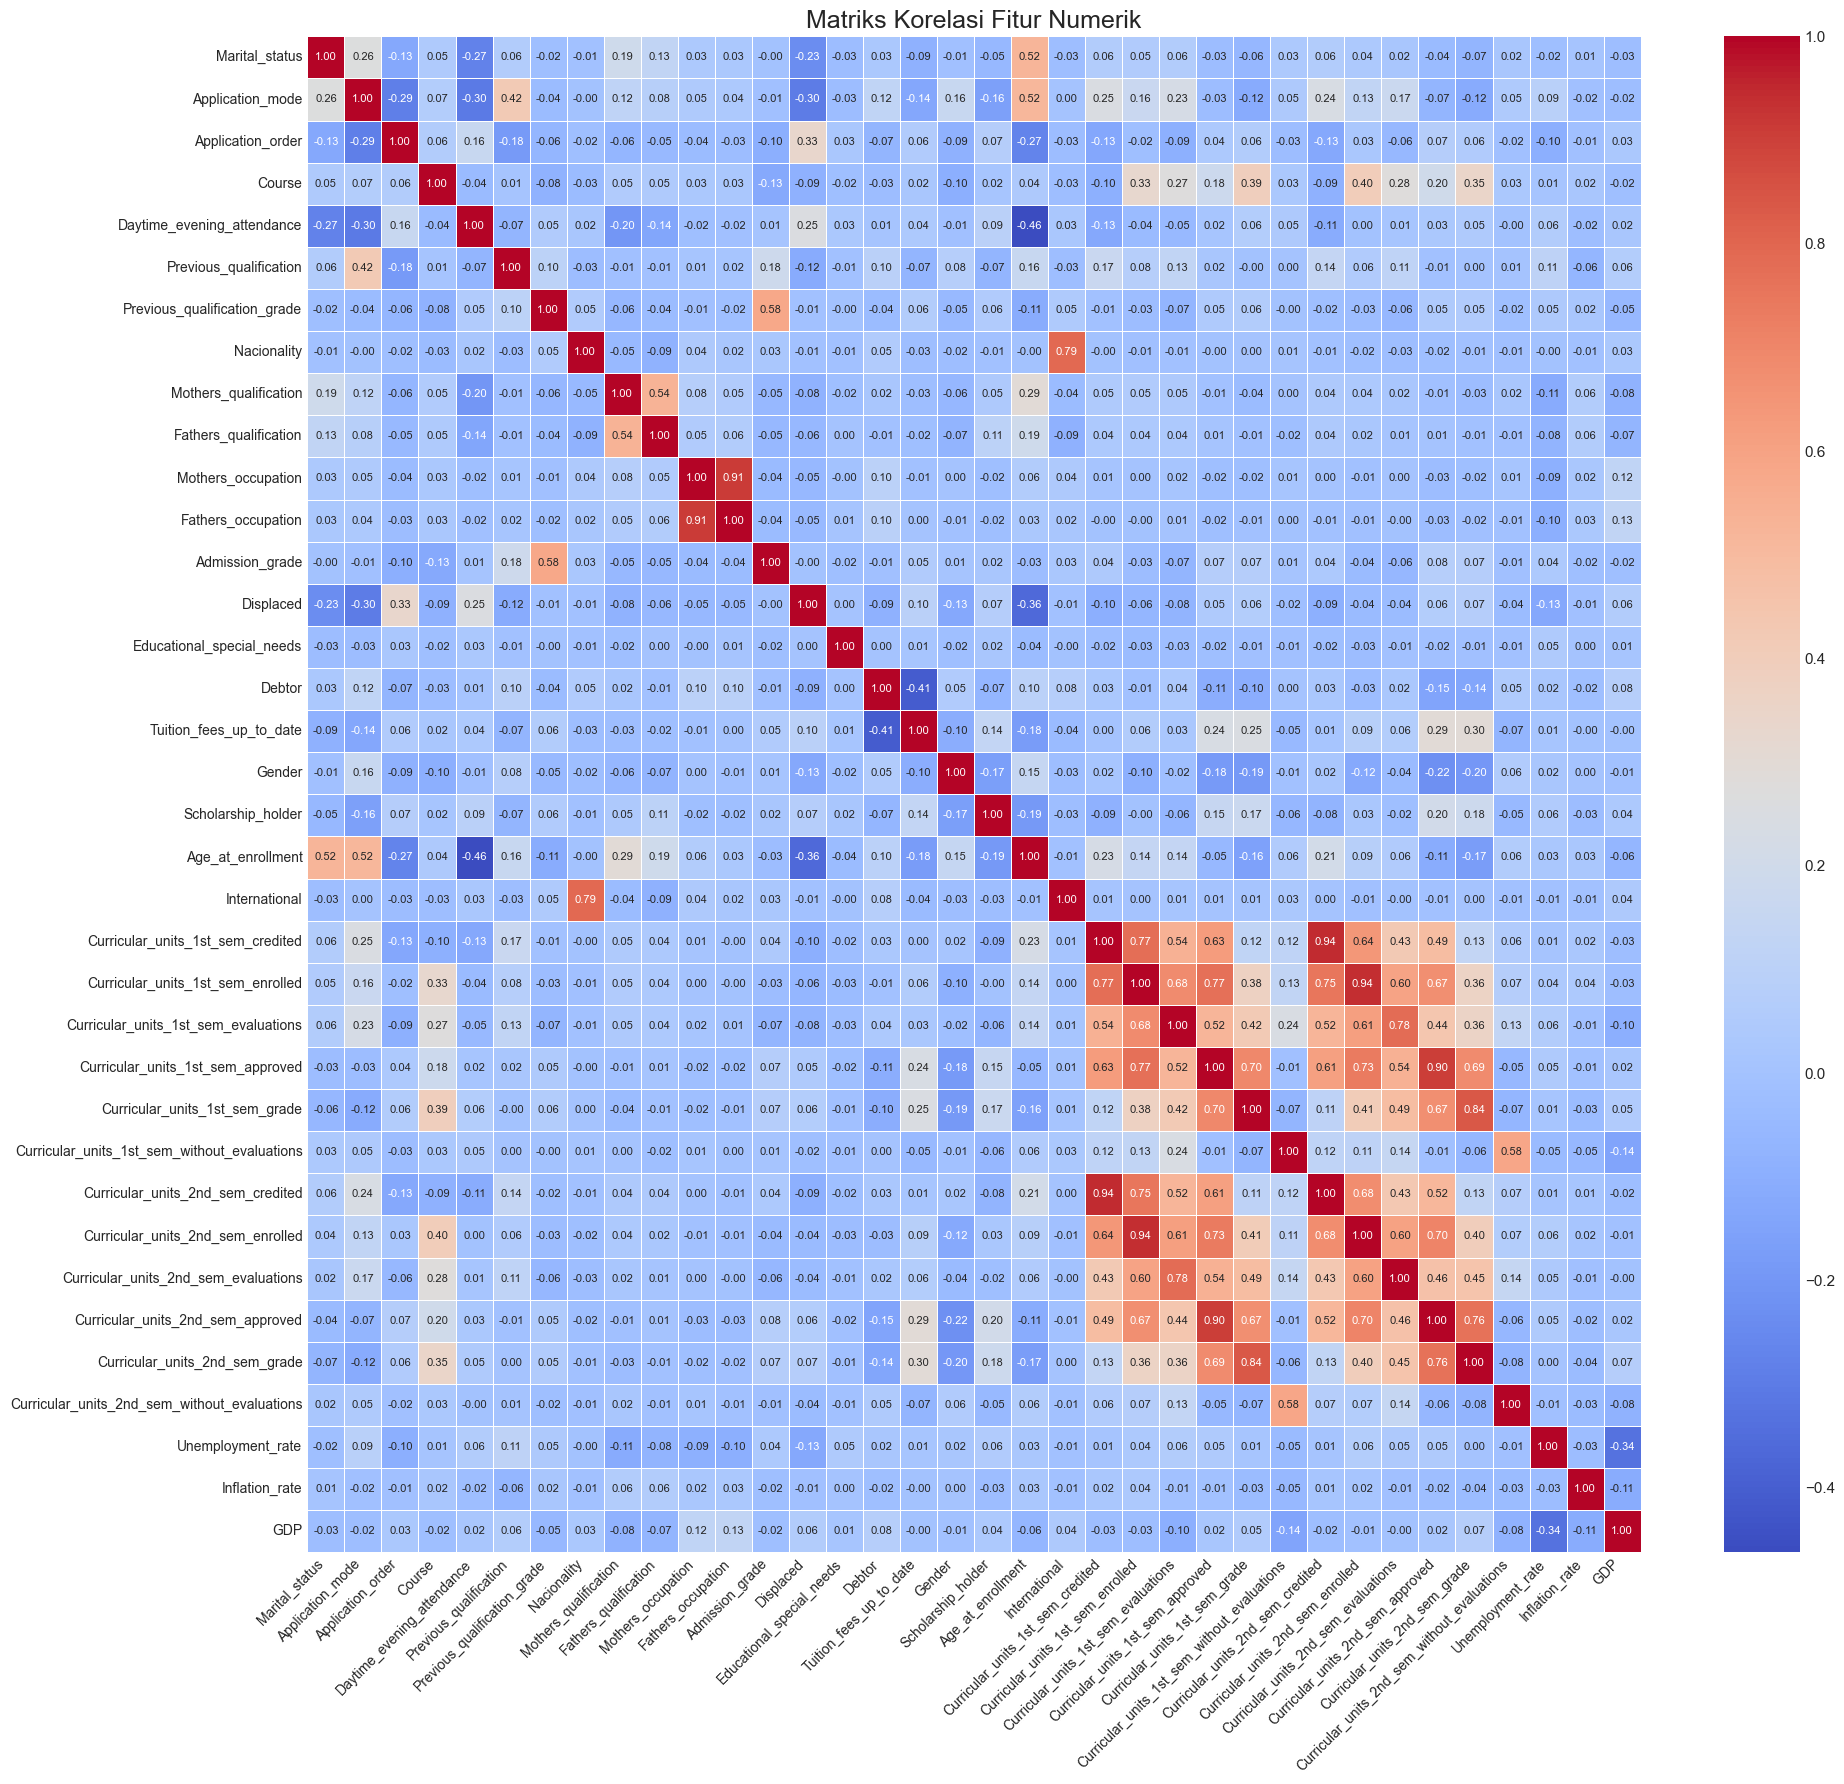

In [46]:
# Pilih semua kolom numerik dari DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns

# Hitung matriks korelasi antar kolom numerik
correlation_matrix = df[numerical_cols].corr()

# Buat figure untuk heatmap dengan ukuran besar agar semua label terlihat
plt.figure(figsize=(20, 18))

# Buat heatmap menggunakan seaborn dengan anotasi nilai korelasi
sns.heatmap(
    correlation_matrix,
    annot=True,              # tampilkan nilai korelasi
    fmt=".2f",               # format angka dua desimal
    cmap='coolwarm',         # skema warna
    linewidths=.5,           # ketebalan garis antar sel
    annot_kws={"size": 8}    # ukuran font anotasi
)

# Tambahkan judul dan sesuaikan tampilan sumbu
plt.title('Matriks Korelasi Fitur Numerik', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)  # rotasi label x agar terbaca
plt.yticks(fontsize=10)  # ukuran font label y

# Atur layout agar tidak terpotong
plt.tight_layout()

# Tampilkan heatmap
plt.show()

Matriks korelasi mengungkap dua klaster utama: pertama, hampir semua metrik beban dan hasil akademik—“curricular\_units” untuk semester 1 dan 2 (credited, enrolled, evaluations, approved, grade, without\_evaluations)—saling berkorelasi sangat tinggi (r ≥ 0.7), menandakan konsistensi antara jumlah SKS diambil dan performa nilai; kedua, fitur “previous\_qualification\_grade” dan “admission\_grade” memiliki korelasi moderat positif (r ≈ 0.58), memperlihatkan bahwa nilai kualifikasi sebelumnya memengaruhi nilai masuk. “Age\_at\_enrollment” juga berkorelasi moderat dengan “marital\_status” dan “application\_mode” (r ≈ 0.52), mengindikasikan pendaftar yang lebih tua cenderung dalam status pernikahan atau jalur pendaftaran tertentu. Korelasi tinggi antara “nationality” dan “international” (r ≈ 0.79) logis—fitur ini sejatinya redundan—sementara variabel makroekonomi (unemployment\_rate, inflation\_rate, GDP) nyaris tak berkorelasi dengan atribut mahasiswa, menandakan dampak eksternal minimal pada data individu. Akhirnya, hubungan negatif cukup kuat antara “debtor” dan “tuition\_fees\_up\_to\_date” (r ≈ –0.41) menunjukkan mahasiswa menunggak cenderung belum membayar SPP tepat waktu.

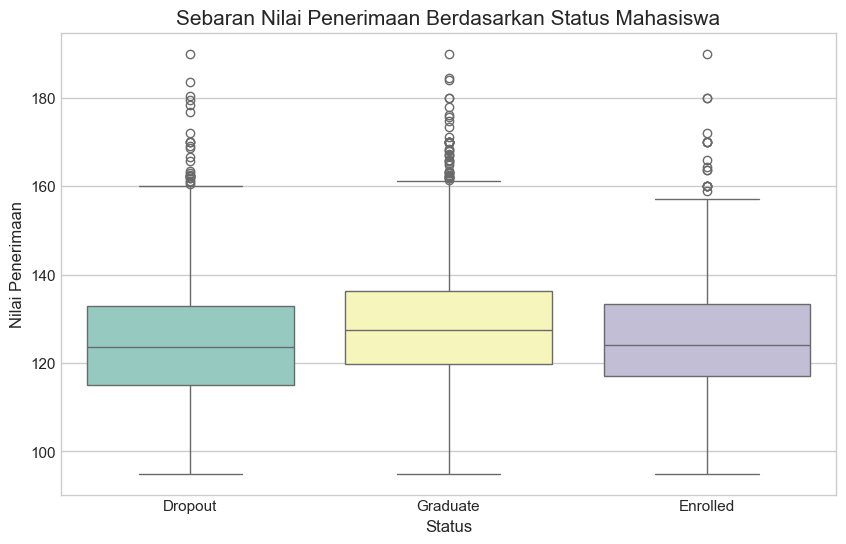

In [47]:
# Buat figure dengan ukuran 10x6 inci
plt.figure(figsize=(10, 6))

# Buat boxplot untuk melihat sebaran nilai 'Admission_grade' berdasarkan kategori 'Status'
sns.boxplot(x='Status', y='Admission_grade', data=df, palette='Set3')

# Tambahkan judul dan label sumbu
plt.title('Sebaran Nilai Penerimaan Berdasarkan Status Mahasiswa', fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Nilai Penerimaan', fontsize=12)

# Tampilkan plot
plt.show()

Boxplot nilai penerimaan (admission grade) menurut status mengungkap pola yang konsisten dengan ekspektasi: mahasiswa **graduate** memiliki median tertinggi (sekitar 128) dan IQR (rentang antar-kuartil) paling sempit, menandakan mereka mayoritas masuk dengan nilai pendaftaran yang relatif tinggi dan seragam; mahasiswa **dropout** menunjukkan median lebih rendah (sekitar 122) dengan IQR sedang, sedangkan **enrolled** berada di posisi menengah (median ≈ 125) namun dengan variasi nilai masuk yang lebih besar. Selain itu terdapat sejumlah outlier di ketiga kelompok (nilai > 160), yang mengindikasikan sebagian kecil pendaftar dengan nilai sangat tinggi; secara keseluruhan, semakin tinggi nilai penerimaan cenderung berkaitan dengan probabilitas kelulusan, sedangkan nilai yang lebih rendah meningkatkan risiko putus studi.

## Data Preparation / Preprocessing

In [48]:
# Buat mapping dari label status ke angka untuk encoding
target_mapper = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# Terapkan mapping ke kolom 'Status' dan simpan hasilnya di kolom baru 'Status_Encoded'
df['Status_Encoded'] = df['Status'].map(target_mapper)

# Tampilkan distribusi nilai setelah encoding
print("\nDistribusi Variabel Target Setelah Encoding:")
print(df['Status_Encoded'].value_counts())

# Definisikan variabel target y sebagai kolom yang telah di-encode
y = df['Status_Encoded']

# Buang kolom asli 'Status' dan kolom encoding untuk membuat fitur X
X = df.drop(['Status', 'Status_Encoded'], axis=1)

# Pastikan semua nama kolom di X bertipe string (untuk kompatibilitas pipeline)
X.columns = [str(col) for col in X.columns]


Distribusi Variabel Target Setelah Encoding:
Status_Encoded
2    2209
0    1421
1     794
Name: count, dtype: int64


In [49]:
# Pilih kolom dengan tipe objek (string) sebagai kandidat kategorikal
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Daftar manual kolom kategorikal tambahan yang ingin diproses
manual_categorical_cols = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Application_order'
]

# Gabungkan kedua daftar, lalu ubah menjadi set untuk menghapus duplikat, kemudian kembali ke list
all_categorical_cols = list(set(categorical_cols + manual_categorical_cols))

# Pilih kolom numerik berdasarkan tipe data number
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Pastikan kolom numerik tidak termasuk dalam daftar kategorikal
numerical_cols = [col for col in numerical_cols if col not in all_categorical_cols]

# Cetak daftar kolom kategorikal beserta jumlahnya
print(f"\nKolom Kategorikal ({len(all_categorical_cols)}): {all_categorical_cols}")

# Cetak daftar kolom numerik yang tersisa beserta jumlahnya
print(f"Kolom Numerik ({len(numerical_cols)}): {numerical_cols}")


Kolom Kategorikal (18): ['Mothers_qualification', 'Fathers_occupation', 'Educational_special_needs', 'Displaced', 'Nacionality', 'Course', 'Tuition_fees_up_to_date', 'Daytime_evening_attendance', 'Scholarship_holder', 'Application_order', 'Fathers_qualification', 'Marital_status', 'Mothers_occupation', 'Gender', 'International', 'Previous_qualification', 'Application_mode', 'Debtor']
Kolom Numerik (18): ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']


In [50]:
# Buat ColumnTransformer untuk preprocessing:
# - OneHotEncoder untuk kolom kategorikal (abaikan nilai tak dikenal, buang satu dummy untuk menghindari multikolinearitas)
# - StandardScaler untuk kolom numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), all_categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # biarkan kolom lain apa adanya (jika ada)
)

# Terapkan preprocessing: fit pada data dan transformasi dilakukan sekaligus
X_processed = preprocessor.fit_transform(X)

# Konversi hasil sparse matrix menjadi DataFrame pandas,
# menggunakan nama fitur yang dihasilkan oleh preprocessor
X_processed_df = pd.DataFrame.sparse.from_spmatrix(
    X_processed,
    columns=preprocessor.get_feature_names_out()
)

# Cetak dimensi DataFrame sesudah One-Hot Encoding dan Scaling
print("\nDimensi data setelah One-Hot Encoding dan Scaling:", X_processed_df.shape)

# Tampilkan lima baris pertama DataFrame hasil preprocessing
display(X_processed_df.head())


Dimensi data setelah One-Hot Encoding dan Scaling: (4424, 244)


,onehot__Mothers_qualification_2,onehot__Mothers_qualification_3,onehot__Mothers_qualification_4,onehot__Mothers_qualification_5,onehot__Mothers_qualification_6,onehot__Mothers_qualification_9,onehot__Mothers_qualification_10,onehot__Mothers_qualification_11,onehot__Mothers_qualification_12,onehot__Mothers_qualification_14,onehot__Mothers_qualification_18,onehot__Mothers_qualification_19,onehot__Mothers_qualification_22,onehot__Mothers_qualification_26,onehot__Mothers_qualification_27,onehot__Mothers_qualification_29,onehot__Mothers_qualification_30,onehot__Mothers_qualification_34,onehot__Mothers_qualification_35,onehot__Mothers_qualification_36,onehot__Mothers_qualification_37,onehot__Mothers_qualification_38,onehot__Mothers_qualification_39,onehot__Mothers_qualification_40,onehot__Mothers_qualification_41,onehot__Mothers_qualification_42,onehot__Mothers_qualification_43,onehot__Mothers_qualification_44,onehot__Fathers_occupation_1,onehot__Fathers_occupation_2,onehot__Fathers_occupation_3,onehot__Fathers_occupation_4,onehot__Fathers_occupation_5,onehot__Fathers_occupation_6,onehot__Fathers_occupation_7,onehot__Fathers_occupation_8,onehot__Fathers_occupation_9,onehot__Fathers_occupation_10,onehot__Fathers_occupation_90,onehot__Fathers_occupation_99,onehot__Fathers_occupation_101,onehot__Fathers_occupation_102,onehot__Fathers_occupation_103,onehot__Fathers_occupation_112,onehot__Fathers_occupation_114,onehot__Fathers_occupation_121,onehot__Fathers_occupation_122,onehot__Fathers_occupation_123,onehot__Fathers_occupation_124,onehot__Fathers_occupation_131,onehot__Fathers_occupation_132,onehot__Fathers_occupation_134,onehot__Fathers_occupation_135,onehot__Fathers_occupation_141,onehot__Fathers_occupation_143,onehot__Fathers_occupation_144,onehot__Fathers_occupation_151,onehot__Fathers_occupation_152,onehot__Fathers_occupation_153,onehot__Fathers_occupation_154,onehot__Fathers_occupation_161,onehot__Fathers_occupation_163,onehot__Fathers_occupation_171,onehot__Fathers_occupation_172,onehot__Fathers_occupation_174,onehot__Fathers_occupation_175,onehot__Fathers_occupation_181,onehot__Fathers_occupation_182,onehot__Fathers_occupation_183,onehot__Fathers_occupation_192,onehot__Fathers_occupation_193,onehot__Fathers_occupation_194,onehot__Fathers_occupation_195,onehot__Educational_special_needs_1,onehot__Displaced_1,onehot__Nacionality_2,onehot__Nacionality_6,onehot__Nacionality_11,onehot__Nacionality_13,onehot__Nacionality_14,onehot__Nacionality_17,onehot__Nacionality_21,onehot__Nacionality_22,onehot__Nacionality_24,onehot__Nacionality_25,onehot__Nacionality_26,onehot__Nacionality_32,onehot__Nacionality_41,onehot__Nacionality_62,onehot__Nacionality_100,onehot__Nacionality_101,onehot__Nacionality_103,onehot__Nacionality_105,onehot__Nacionality_108,onehot__Nacionality_109,onehot__Course_171,onehot__Course_8014,onehot__Course_9003,onehot__Course_9070,onehot__Course_9085,onehot__Course_9119,onehot__Course_9130,onehot__Course_9147,onehot__Course_9238,onehot__Course_9254,onehot__Course_9500,onehot__Course_9556,onehot__Course_9670,onehot__Course_9773,onehot__Course_9853,onehot__Course_9991,onehot__Tuition_fees_up_to_date_1,onehot__Daytime_evening_attendance_1,onehot__Scholarship_holder_1,onehot__Application_order_1,onehot__Application_order_2,onehot__Application_order_3,onehot__Application_order_4,onehot__Application_order_5,onehot__Application_order_6,onehot__Application_order_9,onehot__Fathers_qualification_2,onehot__Fathers_qualification_3,onehot__Fathers_qualification_4,onehot__Fathers_qualification_5,onehot__Fathers_qualification_6,onehot__Fathers_qualification_9,onehot__Fathers_qualification_10,onehot__Fathers_qualification_11,onehot__Fathers_qualification_12,onehot__Fathers_qualification_13,onehot__Fathers_qualification_14,onehot__Fathers_qualification_18,onehot__Fathers_qualification_19,onehot__Fathers_qualification_20,onehot__Fathers_qualification_22,onehot__Fathers_qualification_25,onehot__Fathers_qualification_26,onehot__Fathers_q

In [51]:
# Bagi data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X,                 # fitur
    y,                 # target
    test_size=0.2,     # 20% data untuk set uji, sisanya 80% untuk latih
    random_state=42,   # seed untuk reproduktibilitas
    stratify=y         # pertahankan proporsi kelas target di setiap set
)

# Tampilkan dimensi data latih dan uji
print("\nDimensi data latih (X_train):", X_train.shape)
print("Dimensi data uji (X_test):", X_test.shape)

# Tampilkan distribusi target pada set latih
print("Distribusi target pada y_train:")
print(y_train.value_counts(normalize=True))

# Tampilkan distribusi target pada set uji
print("Distribusi target pada y_test:")
print(y_test.value_counts(normalize=True))


Dimensi data latih (X_train): (3539, 36)
Dimensi data uji (X_test): (885, 36)
Distribusi target pada y_train:
Status_Encoded
2    0.499294
0    0.321277
1    0.179429
Name: proportion, dtype: float64
Distribusi target pada y_test:
Status_Encoded
2    0.499435
0    0.320904
1    0.179661
Name: proportion, dtype: float64


## Modeling

In [52]:
# Definisikan kumpulan model yang akan diuji beserta konfigurasi dasarnya
models = {
    # Regresi Logistik dengan penyeimbangan kelas, max iterasi 1000 untuk konvergensi lebih baik
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'
    ),
    # Pohon Keputusan dengan penyeimbangan kelas untuk menghindari bias kelas mayoritas
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    # Random Forest (ensemble pohon keputusan) dengan penyeimbangan kelas
    'Random Forest': RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    # Gradient Boosting (ensemble boosting) untuk performa lebih baik pada data kompleks
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42
    )
}

--- Melatih dan Mengevaluasi Logistic Regression ---
Akurasi: 0.7311
Presisi (Weighted): 0.7688
Recall (Weighted): 0.7311
F1-score (Weighted): 0.7442

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.82      0.71      0.76       284
    Enrolled       0.41      0.62      0.49       159
    Graduate       0.87      0.79      0.82       442

    accuracy                           0.73       885
   macro avg       0.70      0.70      0.69       885
weighted avg       0.77      0.73      0.74       885


Matriks Konfusi:


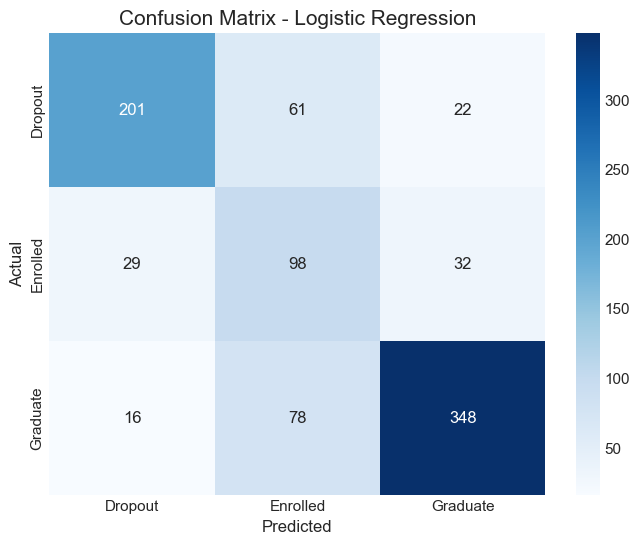

--------------------------------------------------
--- Melatih dan Mengevaluasi Decision Tree ---
Akurasi: 0.6723
Presisi (Weighted): 0.6777
Recall (Weighted): 0.6723
F1-score (Weighted): 0.6749

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.70      0.69      0.69       284
    Enrolled       0.32      0.34      0.33       159
    Graduate       0.79      0.78      0.79       442

    accuracy                           0.67       885
   macro avg       0.60      0.60      0.60       885
weighted avg       0.68      0.67      0.67       885


Matriks Konfusi:


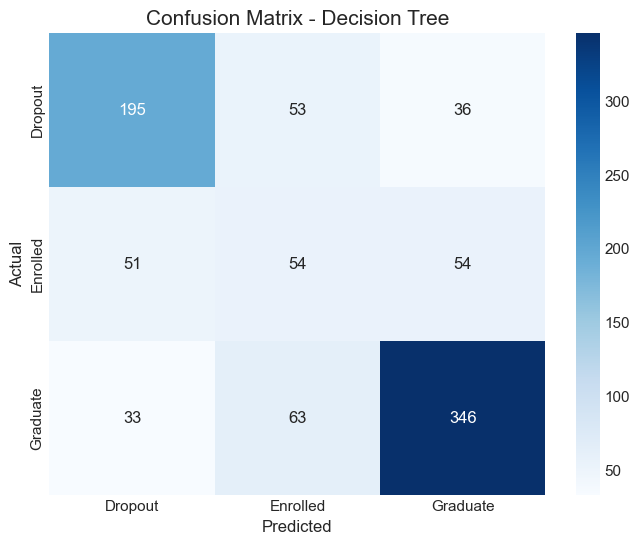

--------------------------------------------------
--- Melatih dan Mengevaluasi Random Forest ---
Akurasi: 0.7661
Presisi (Weighted): 0.7464
Recall (Weighted): 0.7661
F1-score (Weighted): 0.7458

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.77       284
    Enrolled       0.55      0.30      0.38       159
    Graduate       0.79      0.94      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.66      0.67       885
weighted avg       0.75      0.77      0.75       885


Matriks Konfusi:


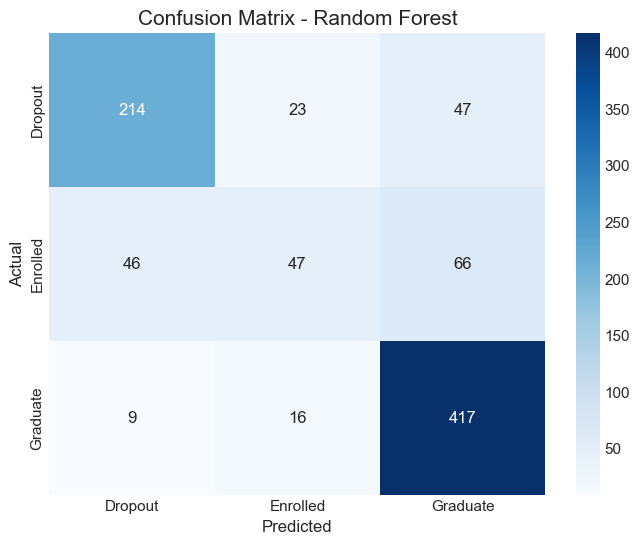

--------------------------------------------------
--- Melatih dan Mengevaluasi Gradient Boosting ---
Akurasi: 0.7537
Presisi (Weighted): 0.7370
Recall (Weighted): 0.7537
F1-score (Weighted): 0.7408

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.78      0.74      0.76       284
    Enrolled       0.50      0.35      0.41       159
    Graduate       0.80      0.91      0.85       442

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885


Matriks Konfusi:


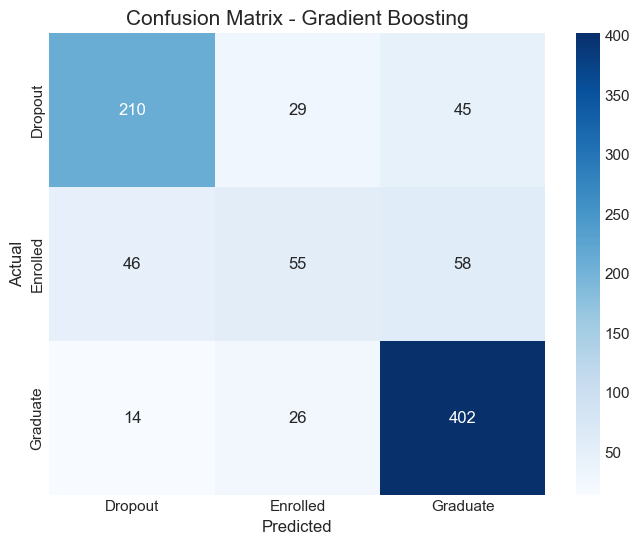

--------------------------------------------------


In [53]:
# Inisialisasi dictionary untuk menyimpan hasil evaluasi setiap model
results = {}

# Loop melalui setiap model dalam dictionary models
for model_name, model in models.items():
    print(f"--- Melatih dan Mengevaluasi {model_name} ---")

    # Buat pipeline berisi preprocessor dan model classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # preprocessing (OneHot + Scaling)
        ('classifier', model)            # model klasifikasi
    ])

    # Latih pipeline pada data latih
    pipeline.fit(X_train, y_train)

    # Lakukan prediksi kelas dan probabilitas pada data uji
    y_pred = pipeline.predict(X_test)
    # Ambil probabilitas kelas positif indeks 1 (jika diperlukan)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)                                 # akurasi
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # presisi tertimbang
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)       # recall tertimbang
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)               # F1-score tertimbang

    # Simpan hasil dan pipeline ke dalam dictionary results
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'model_pipeline': pipeline
    }

    # Tampilkan metrik
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Presisi (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}")
    print(f"F1-score (Weighted): {f1:.4f}")
    print("\nLaporan Klasifikasi:")

    # Susun nama target untuk laporan klasifikasi sesuai urutan encoding
    target_names_report = [key for key, value in sorted(target_mapper.items(), key=lambda item: item[1])]
    # Cetak classification report
    print(classification_report(y_test, y_pred, target_names=target_names_report, zero_division=0))

    print("\nMatriks Konfusi:")
    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Visualisasikan confusion matrix dengan heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,              # tampilkan nilai di setiap sel
        fmt='d',                 # format integer
        cmap='Blues',            # palet warna
        xticklabels=target_names_report,
        yticklabels=target_names_report
    )
    plt.title(f'Confusion Matrix - {model_name}', fontsize=15)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.show()

    # Garis pemisah antar model
    print("-" * 50)

## Evaluation

In [54]:
# Buat DataFrame dari dictionary results, transpose agar model menjadi baris
# Kemudian hapus kolom 'model_pipeline' karena tidak perlu ditampilkan di ringkasan
results_df = pd.DataFrame(results).T.drop(columns=['model_pipeline'])

# Cetak judul bagian ringkasan evaluasi
print("\nRingkasan Hasil Evaluasi Model:")

# Tampilkan DataFrame yang sudah diurutkan berdasarkan F1-score tertinggi
display(results_df.sort_values(by='f1_score', ascending=False))


Ringkasan Hasil Evaluasi Model:


,accuracy,precision,recall,f1_score
Random Forest,0.766102,0.74643,0.766102,0.745826
Logistic Regression,0.731073,0.768839,0.731073,0.744182
Gradient Boosting,0.753672,0.736993,0.753672,0.740771
Decision Tree,0.672316,0.677697,0.672316,0.674905


In [55]:
# Tentukan nama model terbaik berdasarkan F1-score tertinggi
best_model_name = results_df.sort_values(by='f1_score', ascending=False).index[0]
# Ambil pipeline model terbaik dari dictionary results
best_pipeline = results[best_model_name]['model_pipeline']

# Cetak informasi model terbaik dan F1-score-nya
print(f"\nModel terbaik adalah: {best_model_name} dengan F1-score: {results[best_model_name]['f1_score']:.4f}")

# Tentukan path dan nama file untuk menyimpan model
model_filename = 'model/student_status_predictor.joblib'
# Simpan pipeline model terbaik ke file .joblib
joblib.dump(best_pipeline, model_filename)

# Konfirmasi bahwa model telah disimpan
print(f"Model terbaik ('{best_model_name}') telah disimpan sebagai '{model_filename}'")


Model terbaik adalah: Random Forest dengan F1-score: 0.7458
Model terbaik ('Random Forest') telah disimpan sebagai 'model/student_status_predictor.joblib'
